In [1]:
from datasets import load_dataset

#https://huggingface.co/datasets/

dataset_name = "uoft-cs/cifar10"
dataset = load_dataset(dataset_name, split="train")

dataset = dataset.rename_column("img", "image")

c:\Users\natha\scoop\persist\miniconda3\envs\SD3HF\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 50000
})

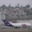

In [3]:
dataset["image"][0]

In [4]:
from transformers import AutoImageProcessor, Dinov2Model

import torch

image = dataset["image"][0]

image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")

model = Dinov2Model.from_pretrained("facebook/dinov2-base")

SAVE=False

if SAVE:

    last_hidden_states = torch.zeros(10000,257,768)

    set_size = 1000
    dataset_size = 10000

    for i in range(0,dataset_size//set_size):
        a=i*set_size
        b=(i+1)*set_size

        input_set = image_processor(dataset["image"][a:b], return_tensors="pt")

        with torch.no_grad():
            outputs = model(**input_set)

        last_hidden_states[a:b] = outputs.last_hidden_state

    print(list(last_hidden_states.shape))

    torch.save(last_hidden_states, "dino_cifar10.pt")

In [6]:
dino_cifar10 = torch.load("dino_cifar10.pt")
print(list(dino_cifar10.shape))

dino_cifar10 = dino_cifar10.reshape(10000,257*768)

[10000, 257, 768]
tensor(True)


torch.Size([1, 197376])
torch.Size([10000, 197376])
torch.Size([10000])
tensor([0.0533, 0.2341, 0.0879,  ..., 0.2432, 0.1303, 0.1645])
tensor(100)
tensor([ 100, 4564, 7887, 7481, 2174, 6881, 9068, 7113, 5983,  877])


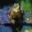

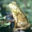

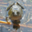

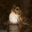

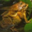

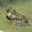

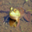

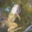

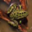

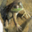

In [24]:
image = dataset["image"][100]
input_image = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**input_image)

last_hidden_state = outputs.last_hidden_state

last_hidden_state = last_hidden_state.reshape(1,257*768)

print(last_hidden_state.shape)
print(dino_cifar10.shape)

cosine_similarity = torch.nn.CosineSimilarity(dim=1)

c = cosine_similarity(last_hidden_state,dino_cifar10)
#c = cosine_similarity(last_hidden_state,dino_cifar10[1])

print(c.shape)
print(c)
print(torch.argmax(c))

best_matches = torch.topk(c,10).indices
print(best_matches)

for i in range(10):
    display(dataset["image"][best_matches[i]])